**Star classification**

**Introduction**

The purpose of this investigation to create models to produce accurate decisions based on a data set. The data set that I have based my investigation on is star classification. By using the data from the star-type-classification data set, I hope to create accurate predictions on classyfing specific star types.

**Hypothesis:**

I believe the best model will be a classifier. The output that I intend my predictions to be are categorical rather than numerical so I'll be implementing some code to do this, and the classifier can create categorical predictions unlike a regressor. I hope I'll be able to make some pretty accurate predictions.

**Importing libraries**

In [1]:
import numpy as np # linear algebra
import pandas as pd # dat processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.tree import DecisionTreeClassifier ,plot_tree# Our model
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import os

**Gathering and exploring data**

The type of data we're dealing with here is numerical and some categorical. The data includes things that describe the stars key features.

- Temperature = Kelvin
- L = Luminosity/Lo (Lo = Avg luminosity of sun)
- R = Radius/Ro (Ro = Avg radius of sun)
- A_M = Absolute magnitude
- Color = General Color of Spectrum
- Spectral_Class = O,B,A,F,G,K,M / SMASS
- Type = Red Dwarf, Brown Dwarf, White Dwarf, Main Sequence , Super Giants, Hyper Giants

The aim and target is to predict the type of star from the given data. By using the temperature, luminosity, radius, etc, we'll be able to find whether it's a red dward, brown dwarf, white dward, main sequence, super giants and hyper giants.

In our data set, there is a wide variety of coulours which will make it hard to code it. So to solve this we'll use a specific code from devchauhan1 where all the mix of colours such as yellow white, whitish, yellowish white are all turned into one colour, where in this case just white. This is the link to that code. https://www.kaggle.com/devchauhan1/star-type-classification-nasa/data

In [2]:
# Create a new Pandas DataFrame with our training data
star_train_data = pd.read_csv('Stars.csv')

x=["Blue-white","Blue White","yellow-white","Blue white","Yellowish White","Blue-White","White-Yellow","Whitish","white"]
for i in x:
    star_train_data.loc[star_train_data["Color"]==i,"Color"]= "White"
for i in ["yellowish","Yellowish"]:
    star_train_data.loc[star_train_data["Color"]==i,"Color"]="Yellow"
for i in ["Orange-Red","Pale yellow orange"]:
    star_train_data.loc[star_train_data["Color"]==i,"Color"]="Orange"


#star_train_data.columns
star_train_data.describe(include='all')
#star_train_data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,240.000000,240.000000,240.000000,240.000000,240,240,240.000000
unique,NaN,NaN,NaN,NaN,5,7,NaN
top,NaN,NaN,NaN,NaN,Red,M,NaN
freq,NaN,NaN,NaN,NaN,112,111,NaN
mean,10497.462500,107188.361635,237.157781,4.382396,NaN,NaN,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,NaN,NaN,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,NaN,NaN,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,NaN,NaN,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,NaN,NaN,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,NaN,NaN,4.000000


**Prepare the data**

In this data set, we fortunately have all columns filled out so there is no need to drop any values. Every feature in the data set has an important value to find out which type of star we're classyfing so there is no need to drop any of them and they all have an equal value of importance.

In [3]:
selected_columns = ['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type']


prepared_data = star_train_data[selected_columns]


prepared_data.describe(include='all')

,Temperature,L,R,A_M,Color,Spectral_Class,Type
count,240.000000,240.000000,240.000000,240.000000,240,240,240.000000
unique,NaN,NaN,NaN,NaN,5,7,NaN
top,NaN,NaN,NaN,NaN,Red,M,NaN
freq,NaN,NaN,NaN,NaN,112,111,NaN
mean,10497.462500,107188.361635,237.157781,4.382396,NaN,NaN,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,NaN,NaN,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,NaN,NaN,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,NaN,NaN,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,NaN,NaN,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,NaN,NaN,4.000000


- The only thing that we're dropping from our features (X) is the acutaly value that we're trying to predict, which in our case is 'Type' (y) which is the star type we're trying to predict.

In [4]:
y = prepared_data.Type


X = prepared_data.drop('Type', axis=1)

y = y.replace({0: 'Red Dwarf', 1: 'Brown Dwarf', 2: 'White Dwarf', 3: 'Main Sequence', 4: 'Super Giant', 5: 'Hyper Giant'})


X.head()

,Temperature,L,R,A_M,Color,Spectral_Class
0,3068,0.002400,0.1700,16.12,Red,M
1,3042,0.000500,0.1542,16.60,Red,M
2,2600,0.000300,0.1020,18.70,Red,M
3,2800,0.000200,0.1600,16.65,Red,M
4,1939,0.000138,0.1030,20.06,Red,M


- With the **get dummies** feature included in the pandas import, we are able to essentially turn **catagorical data into numerical** which is important for us as some of the features in the data set include colour and spectral class which is categorical. By using the get dummies feature we are able to turn it into numerical data because we can't use categorical data in our features when fitting a regressor.

In [5]:
X = pd.get_dummies(X)

X.head()

,Temperature,L,R,A_M,Color_Blue,Color_Orange,Color_Red,Color_White,Color_Yellow,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,3068,0.002400,0.1700,16.12,0,0,1,0,0,0,0,0,0,0,1,0
1,3042,0.000500,0.1542,16.60,0,0,1,0,0,0,0,0,0,0,1,0
2,2600,0.000300,0.1020,18.70,0,0,1,0,0,0,0,0,0,0,1,0
3,2800,0.000200,0.1600,16.65,0,0,1,0,0,0,0,0,0,0,1,0
4,1939,0.000138,0.1030,20.06,0,0,1,0,0,0,0,0,0,0,1,0


**Choosing and training models**

Now that we have prepared our data, we have to split the training set from our validation/testing data.

In [6]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

- To make it a little easier to visualize, a decsision tree has been created from our training data set.

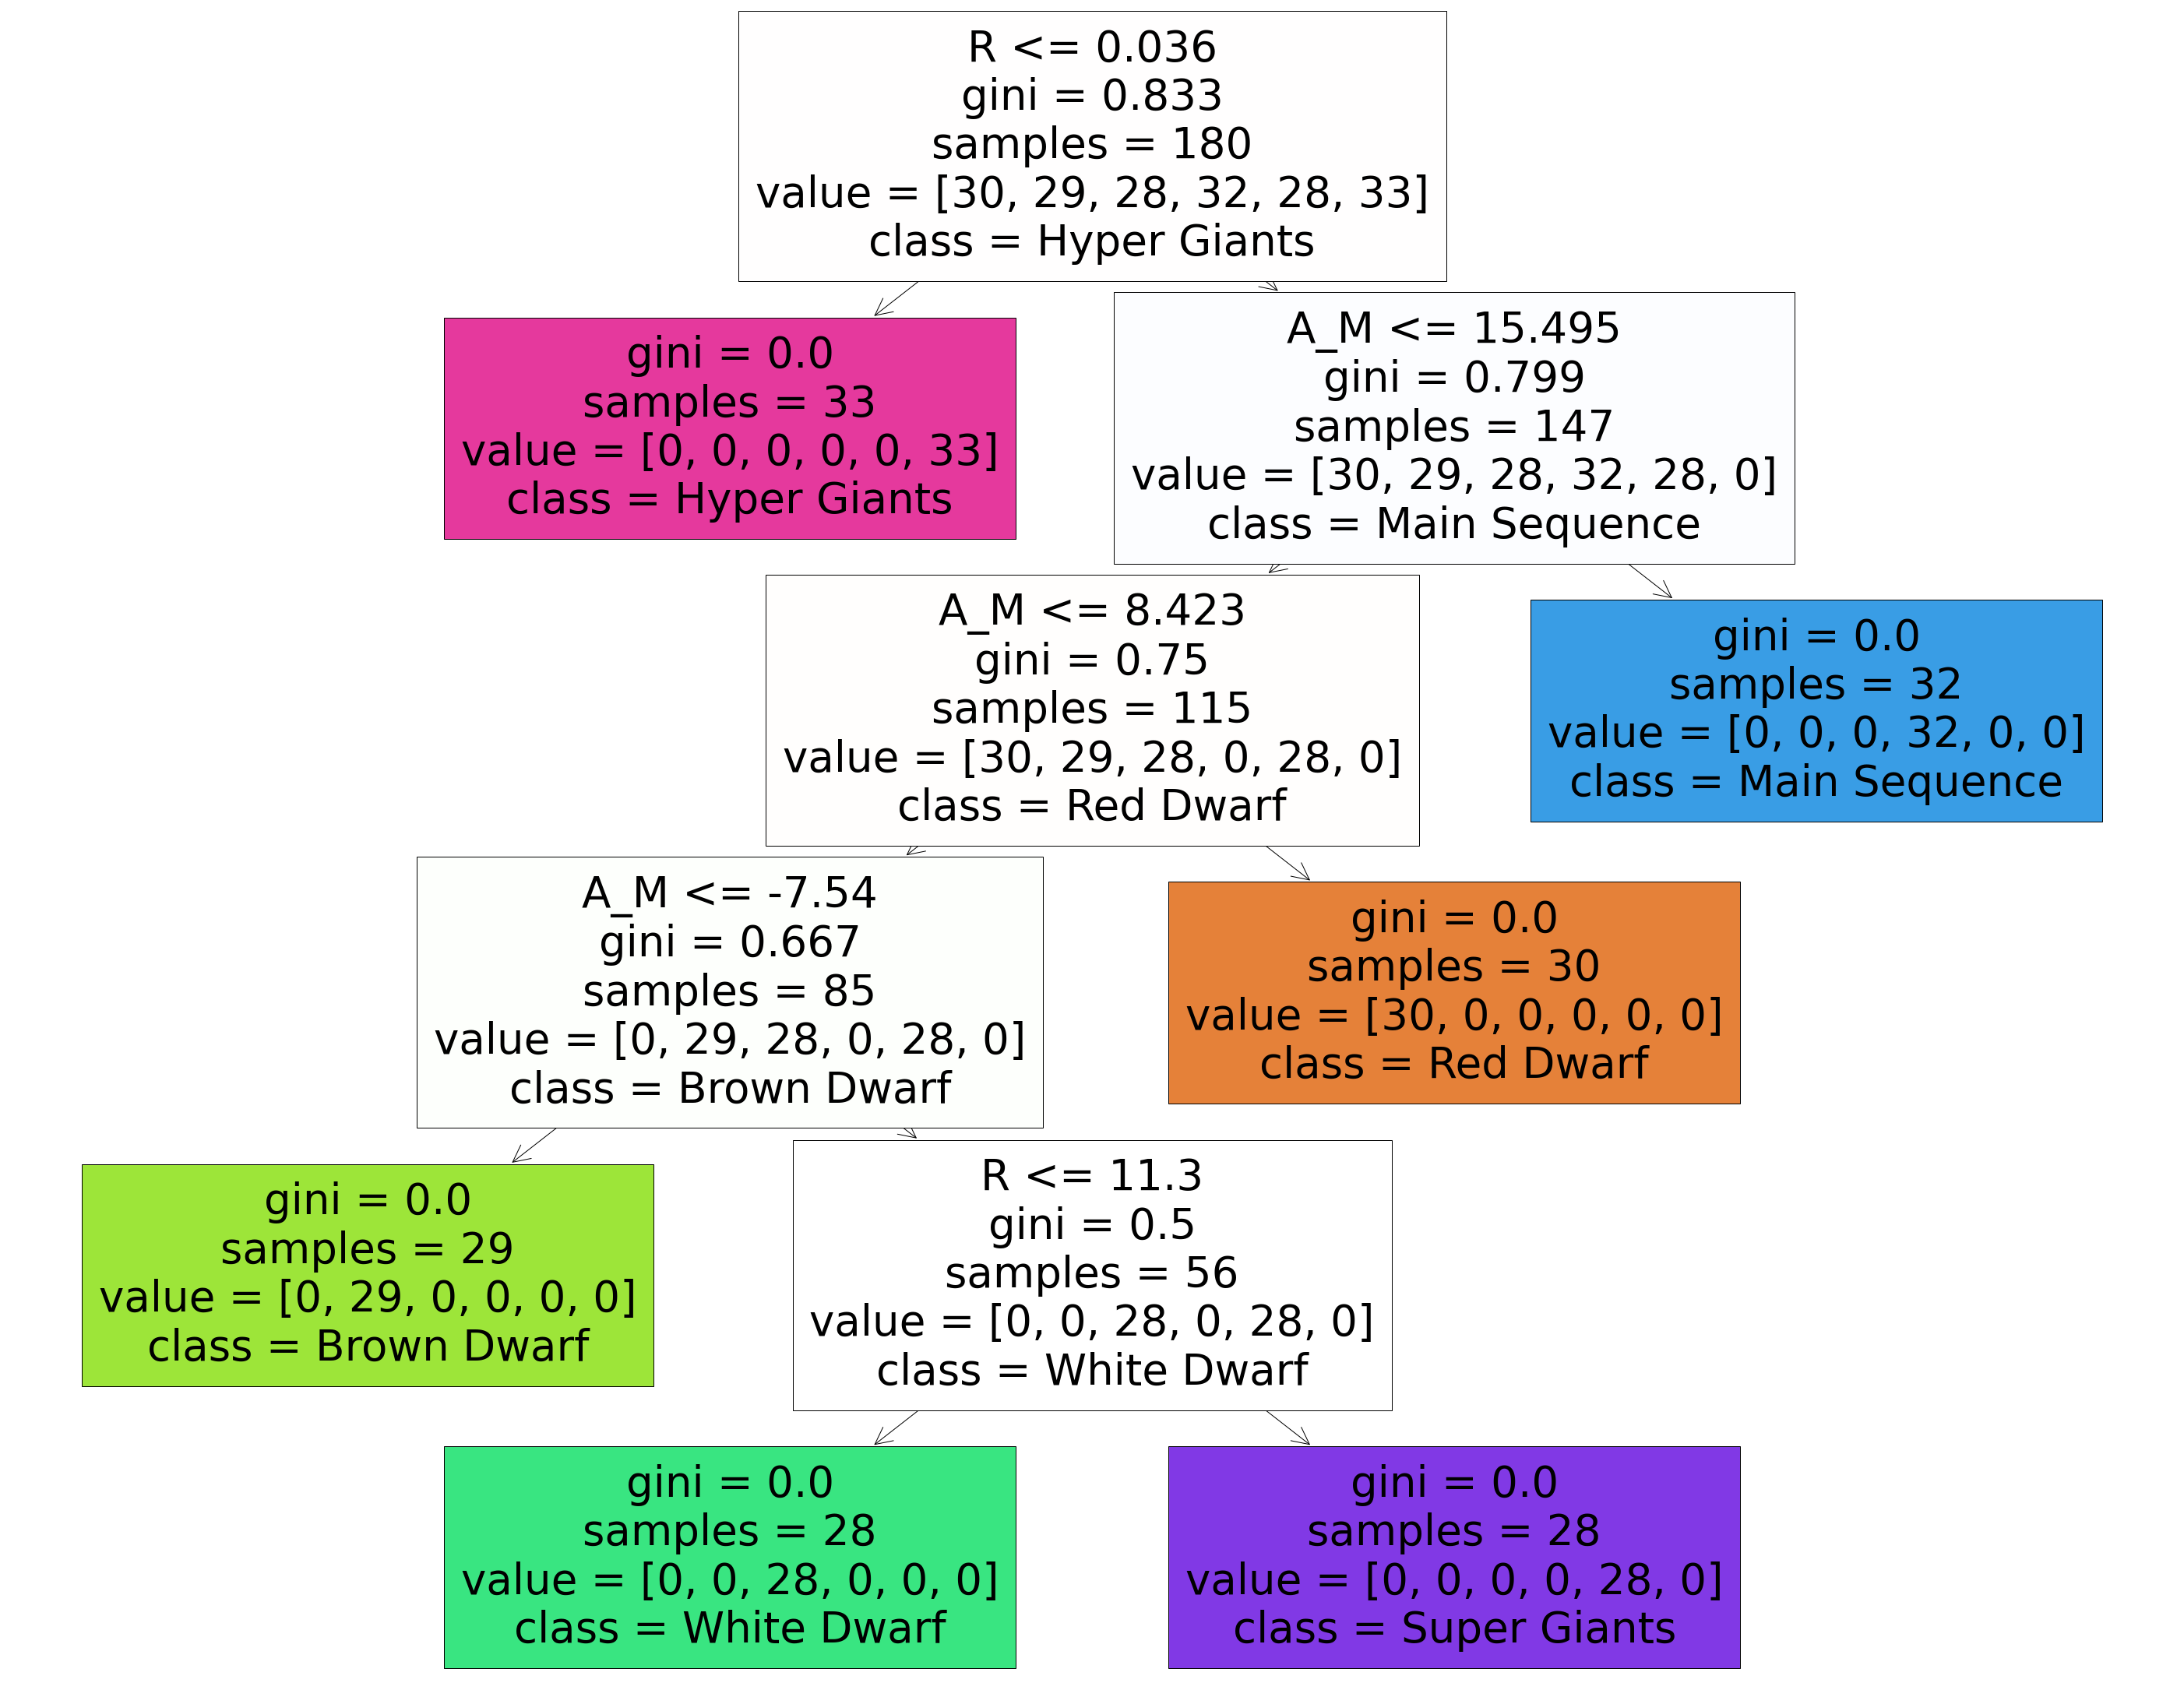

In [7]:
star_model = DecisionTreeClassifier(max_depth = 100)
star_model.fit(train_X, train_y)


plt.figure(figsize = (50,40))
plot_tree(star_model,
          feature_names=train_X.columns,    
          class_names=['Red Dwarf', 'Brown Dwarf', 'White Dwarf', 'Main Sequence', 'Super Giants', 'Hyper Giants'],
          filled=True)
plt.show()


- Here is just an example of what our testing data is actually producing from its own data set.

In [8]:
pred = star_model.predict(train_X)

print("The predictions are:")


X['Star_Type'] = y

X.head()

The predictions are:


,Temperature,L,R,A_M,Color_Blue,Color_Orange,Color_Red,Color_White,Color_Yellow,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O,Star_Type
0,3068,0.002400,0.1700,16.12,0,0,1,0,0,0,0,0,0,0,1,0,Red Dwarf
1,3042,0.000500,0.1542,16.60,0,0,1,0,0,0,0,0,0,0,1,0,Red Dwarf
2,2600,0.000300,0.1020,18.70,0,0,1,0,0,0,0,0,0,0,1,0,Red Dwarf
3,2800,0.000200,0.1600,16.65,0,0,1,0,0,0,0,0,0,0,1,0,Red Dwarf
4,1939,0.000138,0.1030,20.06,0,0,1,0,0,0,0,0,0,0,1,0,Red Dwarf


**Models**

Here is where we fit the models. The models that I've chosen is a decision tree classifier and a random forest classifier. By using two models we can compare the accuracy and find out which model does a better job of predicting the star types on the validation set. We use classifiers instead of regressors because regressors can predict only numerical data whereas we have categorical data in our predictions. The decision tree classifier model creates one decision tree where the random forest model creates multiples decision trees.

In [12]:
star_predictor = DecisionTreeClassifier(max_depth = 5)

star_predictor.fit(train_X, train_y)

classi_val_predictions =  star_predictor.predict(val_X)
accuracy_score(val_y, classi_val_predictions)

0.9833333333333333

In [13]:
star_forest_predictor = RandomForestClassifier(random_state=1, max_depth = 3)

star_forest_predictor.fit(train_X, train_y)

forr_val_preds = star_forest_predictor.predict(val_X)
accuracy_score(val_y, forr_val_preds)  

1.0

**Evaluating and comparing predictions**

From our results we can conclude that **random forest classsifier has more accurate predictions** than the decision tree classifier at a 100% accuracy rate! The random forest may create more accurate decisions but the decision tree classifier is also very successful with a 98% accuracy. The random forest had more accurate predictions because it creates many decision trees to get a more accurate prediction whereas the decision tree classifier only uses one decision tree.

**Hyper Parameter tuning**

To get the most accurate predictions from our models we have to tweak the hyper parameters a bit. To get the most accurate prediction for the Decision tree classifier, the max depth needs to be 5 or more. To get the most accurate prediction for the random forest which is 100% accuracy, we need a depth of 3 or more.

**Conclusion**

The purpose of this investigation was too predict star types from the given data which included radius, colour, luminosity, etc. After working through the steps of machine learning we were finally able to create predictions based on the given data set. After testing the accuracy of the predictions we found some interesting results for the models. The decision tree classifier had an amazing accuracy score with 98% however the real mystery was produced from the random forest classifier with 100% accuracy.